# New Section

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
import zipfile
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


from google.colab import drive
drive.mount('/content/drive',force_remount=True)

zf = zipfile.ZipFile('/content/drive/My Drive/ddosat/ddos.zip')
zf.extractall("/tmp")


In [ ]:
zf = zipfile.ZipFile('/content/drive/My Drive/ddosat/ddos.zip') 
zf.extractall("/tmp")

/tmp


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
d1 = pd.read_csv('01-12/DrDoS_DNS.csv',nrows=200000)
d1 = d1.sample(n=40000,random_state=24)
d2 = pd.read_csv('01-12/DrDoS_LDAP.csv',nrows=200000)
d2 = d2.sample(n=40000,random_state=24)
d3 = pd.read_csv('01-12/DrDoS_MSSQL.csv',nrows=200000)
d3 = d3.sample(n=40000,random_state=24)
d4 = pd.read_csv('01-12/DrDoS_NetBIOS.csv',nrows=200000)
d4 = d4.sample(n=40000,random_state=24)
d5 = pd.read_csv('01-12/DrDoS_NTP.csv',nrows=200000)
d5 = d5.sample(n=40000,random_state=24)
d6 = pd.read_csv('01-12/DrDoS_SNMP.csv',nrows=200000)
d6 = d6.sample(n=40000,random_state=24)
d7 = pd.read_csv('01-12/DrDoS_SSDP.csv',nrows=200000)
d7 = d7.sample(n=40000,random_state=24)
d8 = pd.read_csv('01-12/DrDoS_UDP.csv',nrows=200000)
d8 = d8.sample(n=40000,random_state=24)
d9 = pd.read_csv('01-12/Syn.csv',nrows=200000)
d9 = d9.sample(n=40000,random_state=24)
d10 = pd.read_csv('01-12/TFTP.csv',nrows=200000)
d10 = d10.sample(n=40000,random_state=24)
d11 = pd.read_csv('01-12/UDPLag.csv',nrows=200000)
d11 = d11.sample(n=40000,random_state=24)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440000 entries, 184164 to 45567
Data columns (total 88 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    440000 non-null  uint32 
 1   Flow ID                       440000 non-null  object 
 2    Source IP                    440000 non-null  object 
 3    Source Port                  440000 non-null  uint16 
 4    Destination IP               440000 non-null  object 
 5    Destination Port             440000 non-null  uint32 
 6    Protocol                     440000 non-null  uint8  
 7    Timestamp                    440000 non-null  object 
 8    Flow Duration                440000 non-null  uint32 
 9    Total Fwd Packets            440000 non-null  uint32 
 10   Total Backward Packets       440000 non-null  uint16 
 11  Total Length of Fwd Packets   440000 non-null  uint32 
 12   Total Length of Bwd Packets  440000 non

In [ ]:
df[' Label'].value_counts()

Syn              39995
DrDoS_SNMP       39990
DrDoS_LDAP       39985
DrDoS_SSDP       39980
DrDoS_NetBIOS    39900
DrDoS_MSSQL      39854
TFTP             39826
DrDoS_UDP        39789
DrDoS_DNS        39637
UDP-lag          39225
DrDoS_NTP        37446
BENIGN            4298
WebDDoS             75
Name:  Label, dtype: int64

In [ ]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 91549 to 55172
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    40000 non-null  int64  
 1   Flow ID                       40000 non-null  object 
 2    Source IP                    40000 non-null  object 
 3    Source Port                  40000 non-null  int64  
 4    Destination IP               40000 non-null  object 
 5    Destination Port             40000 non-null  int64  
 6    Protocol                     40000 non-null  int64  
 7    Timestamp                    40000 non-null  object 
 8    Flow Duration                40000 non-null  int64  
 9    Total Fwd Packets            40000 non-null  int64  
 10   Total Backward Packets       40000 non-null  int64  
 11  Total Length of Fwd Packets   40000 non-null  float64
 12   Total Length of Bwd Packets  40000 non-null  float64
 1

In [ ]:
df = pd.concat([d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11])

In [ ]:
def Pre_process_data(df,col):
    '''
    Input: Data-frame and Column name.
    Operation: Fills the nan values with the minimum value in their respective column.
    Output: Returns the pre-processed data-frame.
    '''
    #df['primary_use'] = df['primary_use'].astype("category").cat.codes
    print("Name of column with NaN: "+str(col))
    print(df[col].value_counts(dropna=False, normalize=True).head())
    df[col].replace(np.inf, -1, inplace=True)
    
    return df

In [ ]:
def reduce_mem_usage(df):
    '''
    Input - data-frame.
    Operation - Reduce memory usage of the data-frame.
    '''
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    #NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in df.columns:
        if df[col].dtype != object:  # Exclude strings            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",df[col].dtype)            
            # make variables for Int, max and min
            IsInt = False
            mx = df[col].max()
            mn = df[col].min()
            #print("min for this col: ",mn)
            #print("max for this col: ",mx)
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(df[col]).all(): 
                #NAlist.append(col)
                df = Pre_process_data(df,col)
                   
            # test if column can be converted to an integer
            asint = df[col].fillna(0).astype(np.int64)
            result = (df[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        df[col] = df[col].astype(np.uint8)
                    elif mx < 65535:
                        df[col] = df[col].astype(np.uint16)
                    elif mx < 4294967295:
                        df[col] = df[col].astype(np.uint32)
                    else:
                        df[col] = df[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)    
            # Make float datatypes 32 bit
            else:
                df[col] = df[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",df[col].dtype)
            print("******************************")
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return df

In [ ]:
df = reduce_mem_usage(df)

Memory usage of properties dataframe is : 298.76708984375  MB
******************************
Column:  Unnamed: 0
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:   Source Port
dtype before:  int64
dtype after:  uint16
******************************
******************************
Column:   Destination Port
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:   Protocol
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:   Flow Duration
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:   Total Fwd Packets
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:   Total Backward Packets
dtype before:  int64
dtype after:  uint16
******************************
******************************
Column:

In [ ]:
data_ = df
df[' Label'].value_counts()

Syn              39995
DrDoS_SNMP       39990
DrDoS_LDAP       39985
DrDoS_SSDP       39980
DrDoS_NetBIOS    39900
DrDoS_MSSQL      39854
TFTP             39826
DrDoS_UDP        39789
DrDoS_DNS        39637
UDP-lag          39225
DrDoS_NTP        37446
BENIGN            4298
WebDDoS             75
Name:  Label, dtype: int64

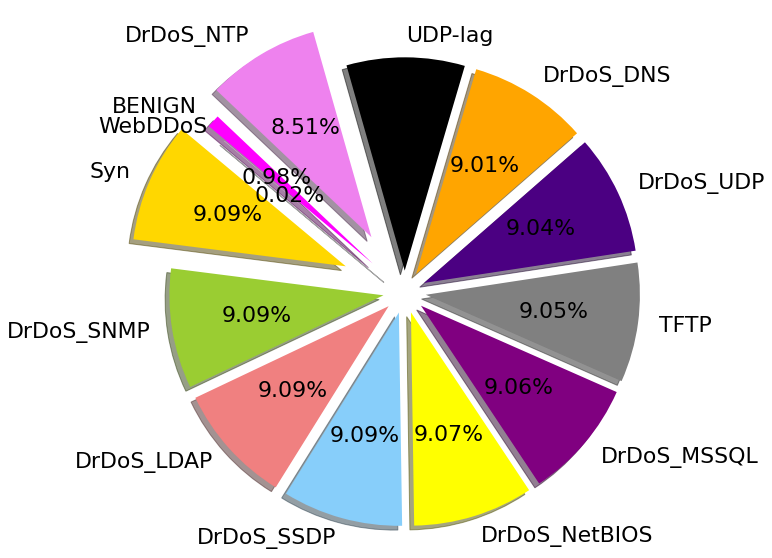

In [ ]:
labels = 'Syn', 'DrDoS_SNMP','DrDoS_LDAP','DrDoS_SSDP','DrDoS_NetBIOS','DrDoS_MSSQL','TFTP','DrDoS_UDP','DrDoS_DNS','UDP-lag','DrDoS_NTP','BENIGN','WebDDoS'
sizes = [len(data_[data_[' Label']=='Syn']), len(data_[data_[' Label']=='DrDoS_SNMP']), 
         len(data_[data_[' Label']=='DrDoS_LDAP']), len(data_[data_[' Label']=='DrDoS_SSDP']),
         len(data_[data_[' Label']=='DrDoS_NetBIOS']),len(data_[data_[' Label']=='DrDoS_MSSQL']),
         len(data_[data_[' Label']=='TFTP']),
         len(data_[data_[' Label']=='DrDoS_UDP']),len(data_[data_[' Label']=='DrDoS_DNS']),len(data_[data_[' Label']=='UDP-lag']),len(data_[data_[' Label']=='DrDoS_NTP']),len(data_[data_[' Label']=='BENIGN']),
         len(data_[data_[' Label']=='WebDDoS'])]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','yellow','purple','grey','indigo','orange','black','violet','magenta','white']
explode = (0.3, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.3,0.2,0.1)  # explode 1st slice

# Plot
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Text(0, 0.5, ' Flow Packets/s')

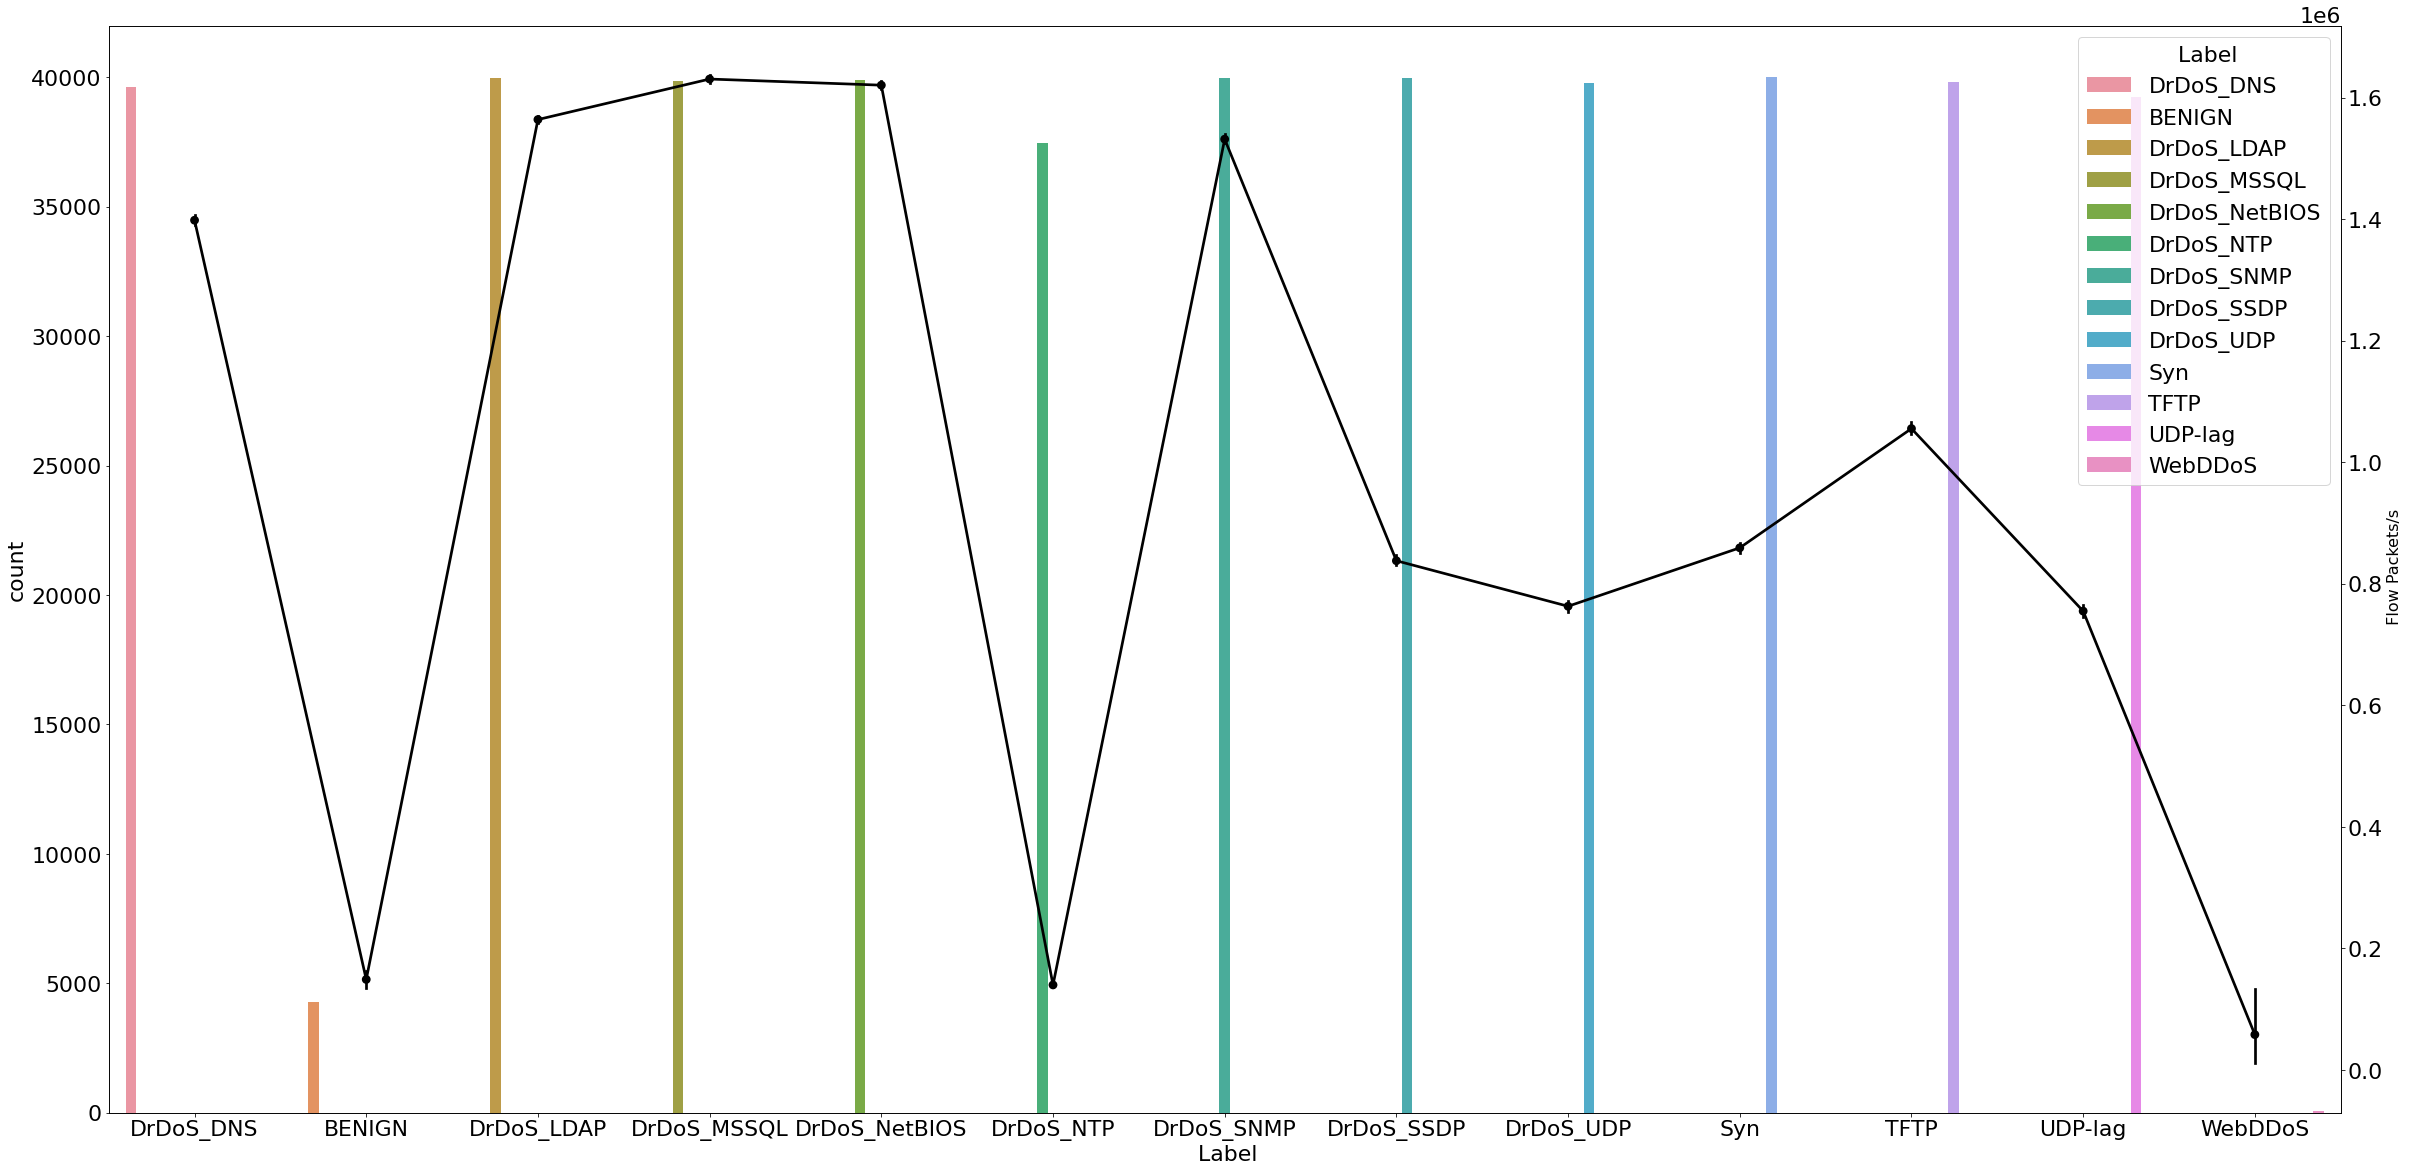

In [ ]:
plt.figure(figsize=(40,20))
g1 = sns.countplot(x=' Label', hue=' Label', data=data_)
gt = g1.twinx()
gt = sns.pointplot(y=' Flow Packets/s', x=' Label', data=data_, color='black', legend=True)
gt.set_ylabel(" Flow Packets/s", fontsize=16)

In [ ]:
plt.figure(figsize=(20,16))
g1 = sns.countplot(x=' Label', hue=' Label', data=data_)
gt = g1.twinx()
gt = sns.pointplot(y='Flow Bytes/s', x=' Label', data=data_, color='black', legend=False)
gt.set_ylabel("Flow Bytes/s", fontsize=16)

Text(0, 0.5, 'Fwd Packets/s')

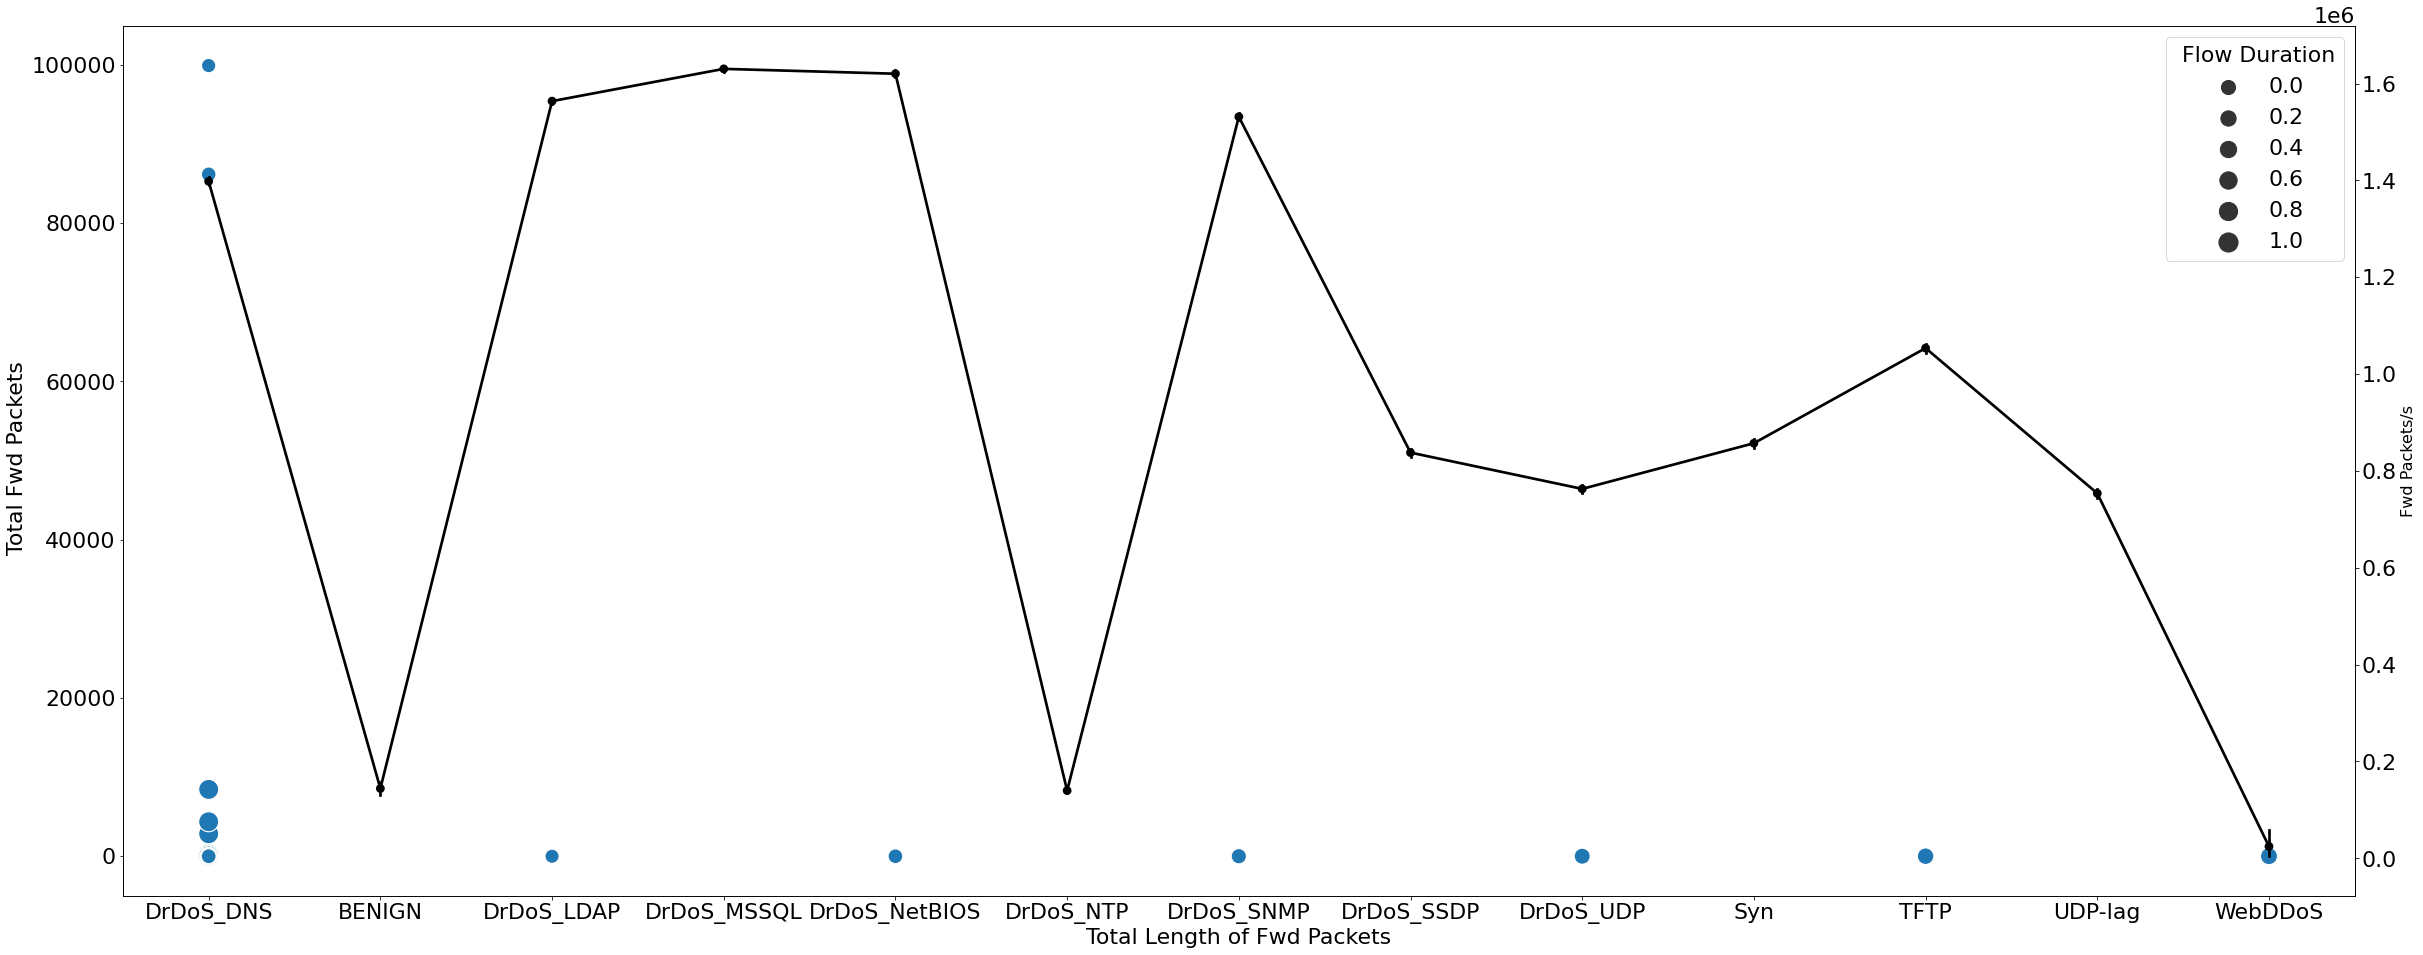

In [ ]:
plt.figure(figsize=(40,16))
g1 = sns.scatterplot(y=' Total Fwd Packets', x='Total Length of Fwd Packets',
                     sizes=(200, 400), size=' Flow Duration',data=data_)

gt = g1.twinx()
t = sns.pointplot(y='Fwd Packets/s', x=' Label', data=data_, color='black', legend=False)
gt.set_ylabel("Fwd Packets/s", fontsize=16)

Text(0, 0.5, 'Bwd Packets/s')

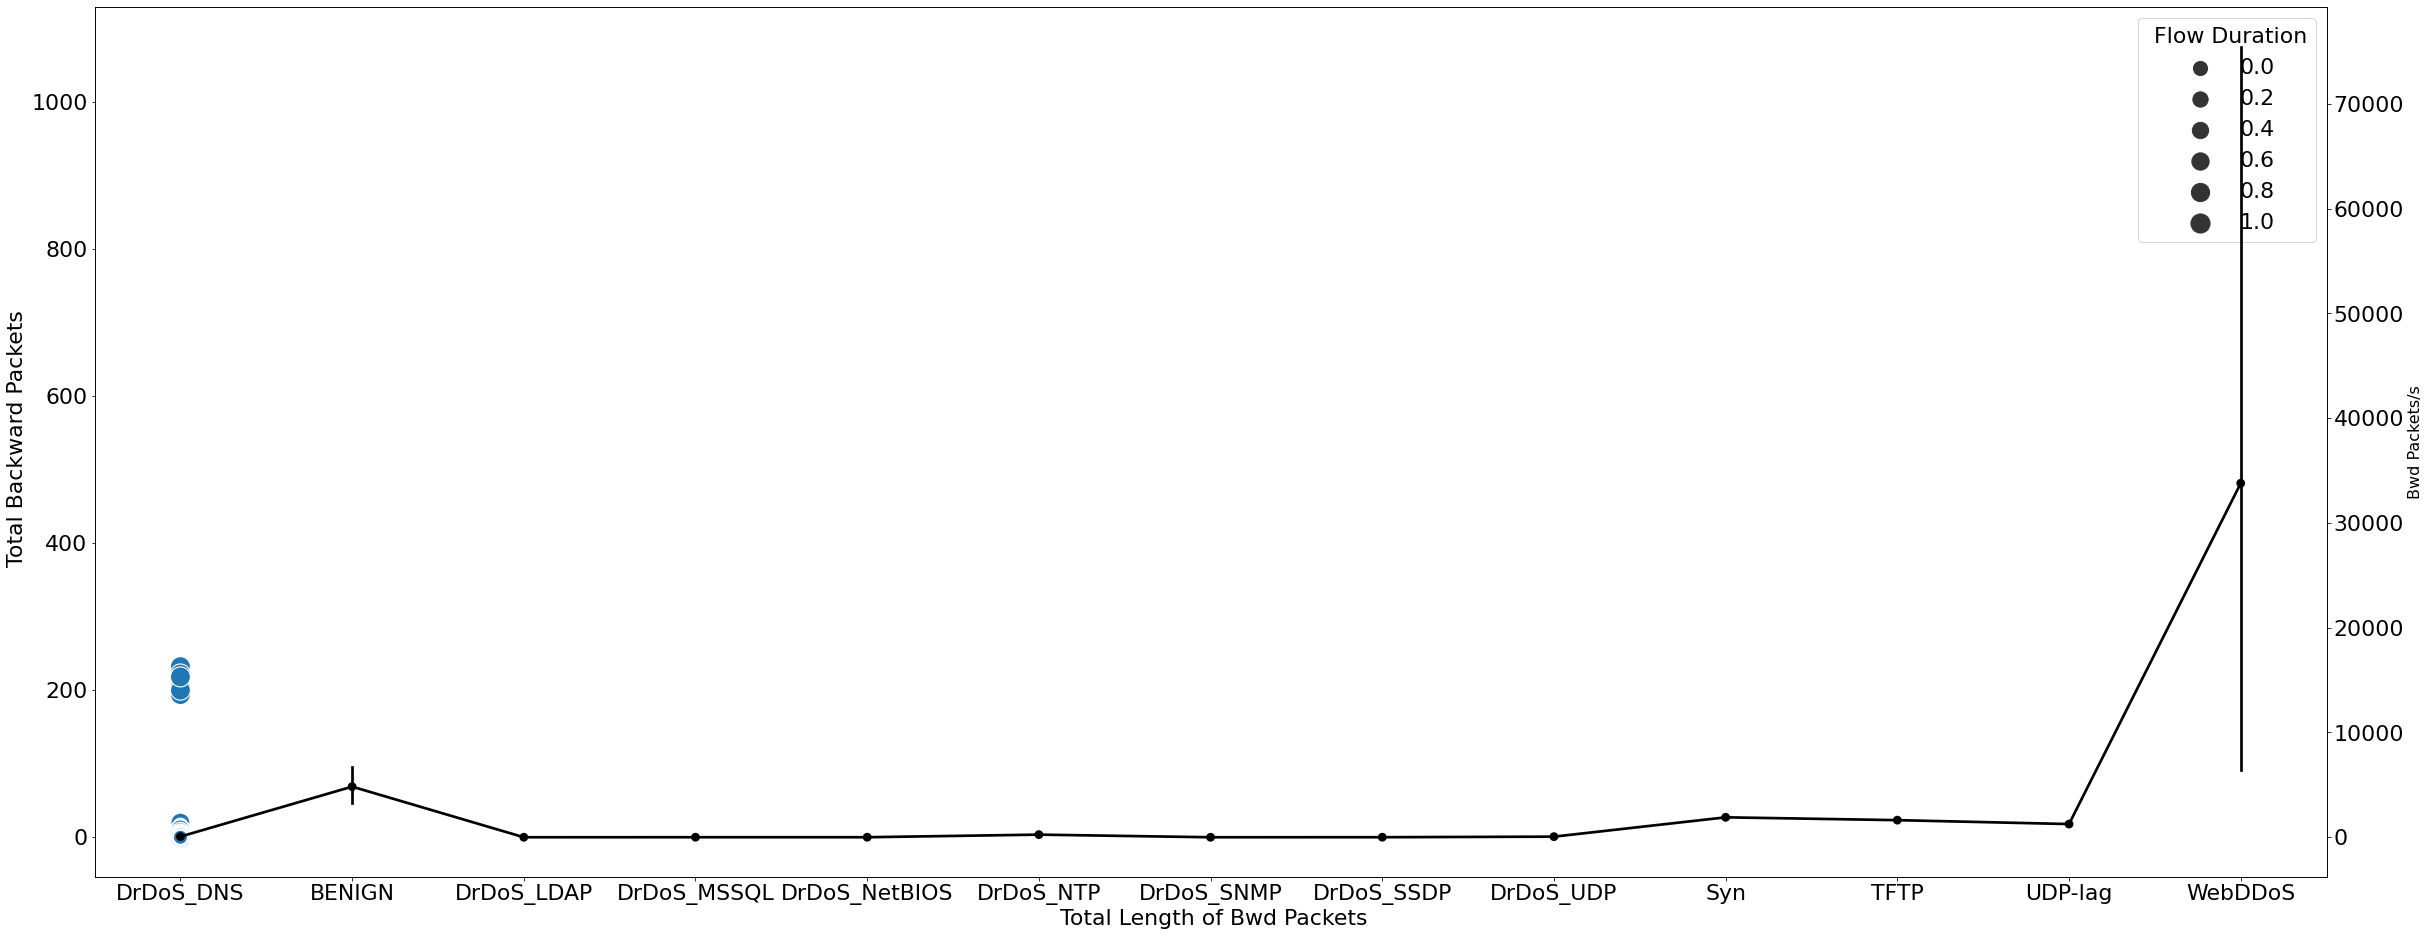

In [ ]:
plt.figure(figsize=(40,16))
g1 = sns.scatterplot(y=' Total Backward Packets', x=' Total Length of Bwd Packets',
                     sizes=(200, 400), size=' Flow Duration',data=data_)
gt = g1.twinx()
t = sns.pointplot(y=' Bwd Packets/s', x=' Label', data=data_, color='black', legend=False)
gt.set_ylabel("Bwd Packets/s", fontsize=16)


plt.figure(figsize=(20,16))
g1 = sns.scatterplot(y=' Total Backward Packets', x=' Total Length of Bwd Packets',
                     sizes=(200, 400), size=' Flow Duration',data=data_)
gt = g1.twinx()
t = sns.pointplot(y=' Bwd Packets/s', x=' Label', data=data_, color='black', legend=False)
gt.set_ylabel("Bwd Packets/s", fontsize=16)

Text(0, 0.5, ' Protocol')

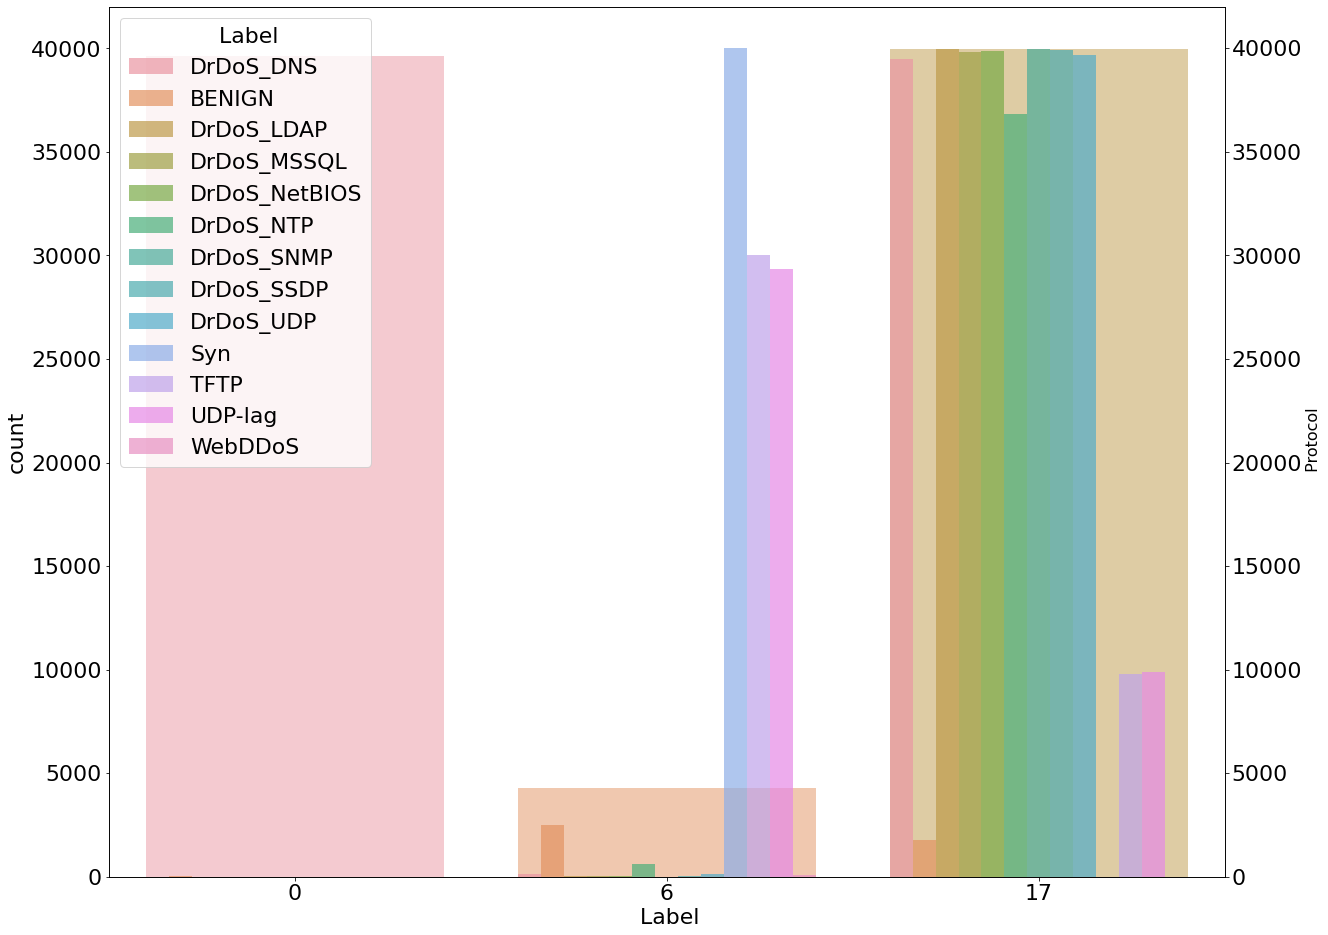

In [ ]:
plt.figure(figsize=(20,16))
g1 = sns.countplot(x=' Label', data=data_,alpha=0.5)
gt = g1.twinx()
gt = sns.countplot(x=' Protocol', hue=' Label',alpha=0.7, data=data_)
gt.set_ylabel(" Protocol", fontsize=16)

Text(0, 0.5, ' Inbound')

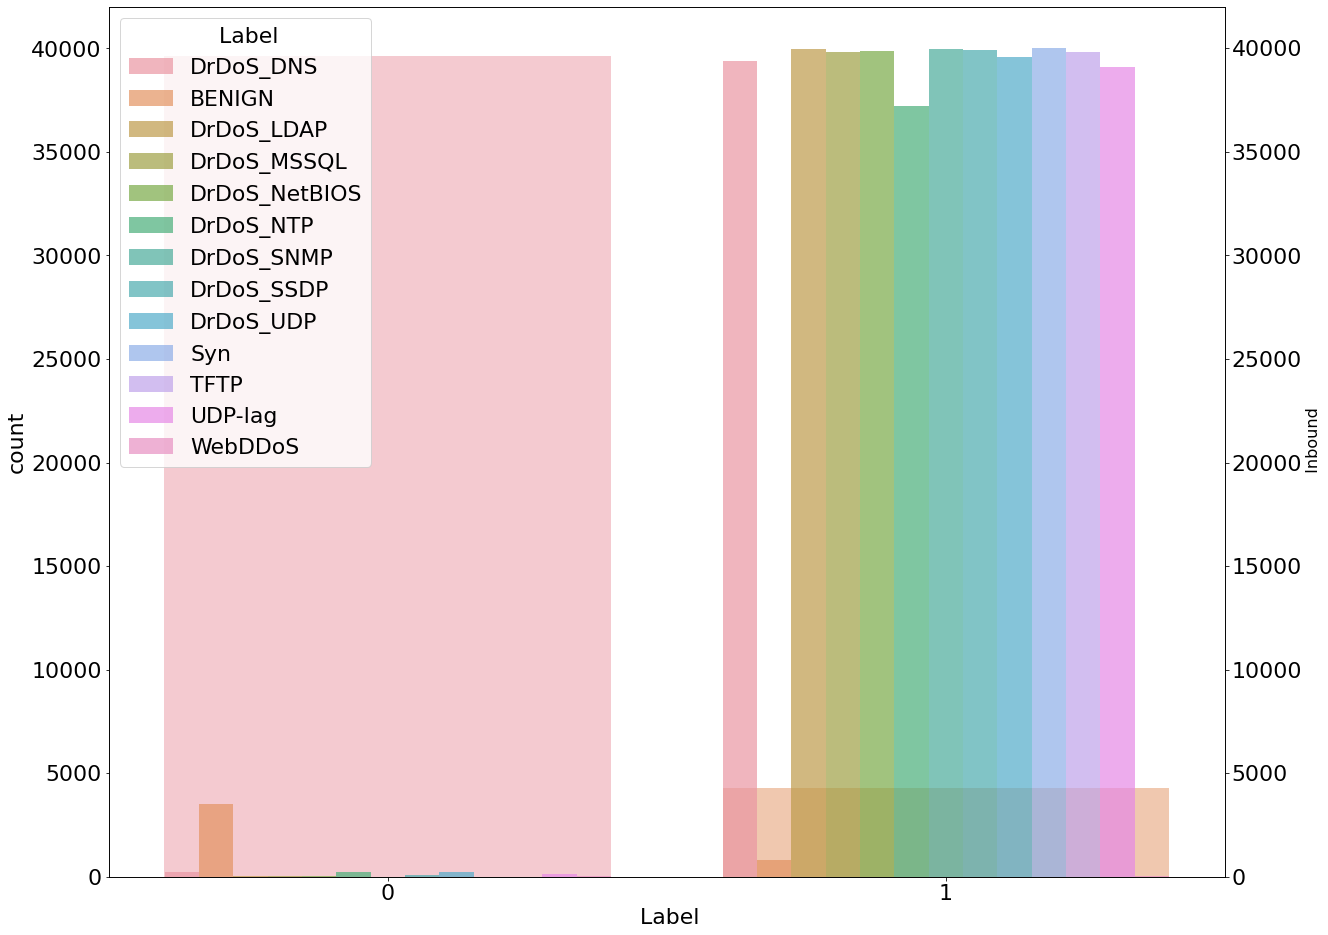

In [ ]:
plt.figure(figsize=(20,16))
g1 = sns.countplot(x=' Label', data=data_,alpha=0.5)
gt = g1.twinx()
gt = sns.countplot(x=' Inbound', hue=' Label',alpha=0.7, data=data_)
gt.set_ylabel(' Inbound', fontsize=16)

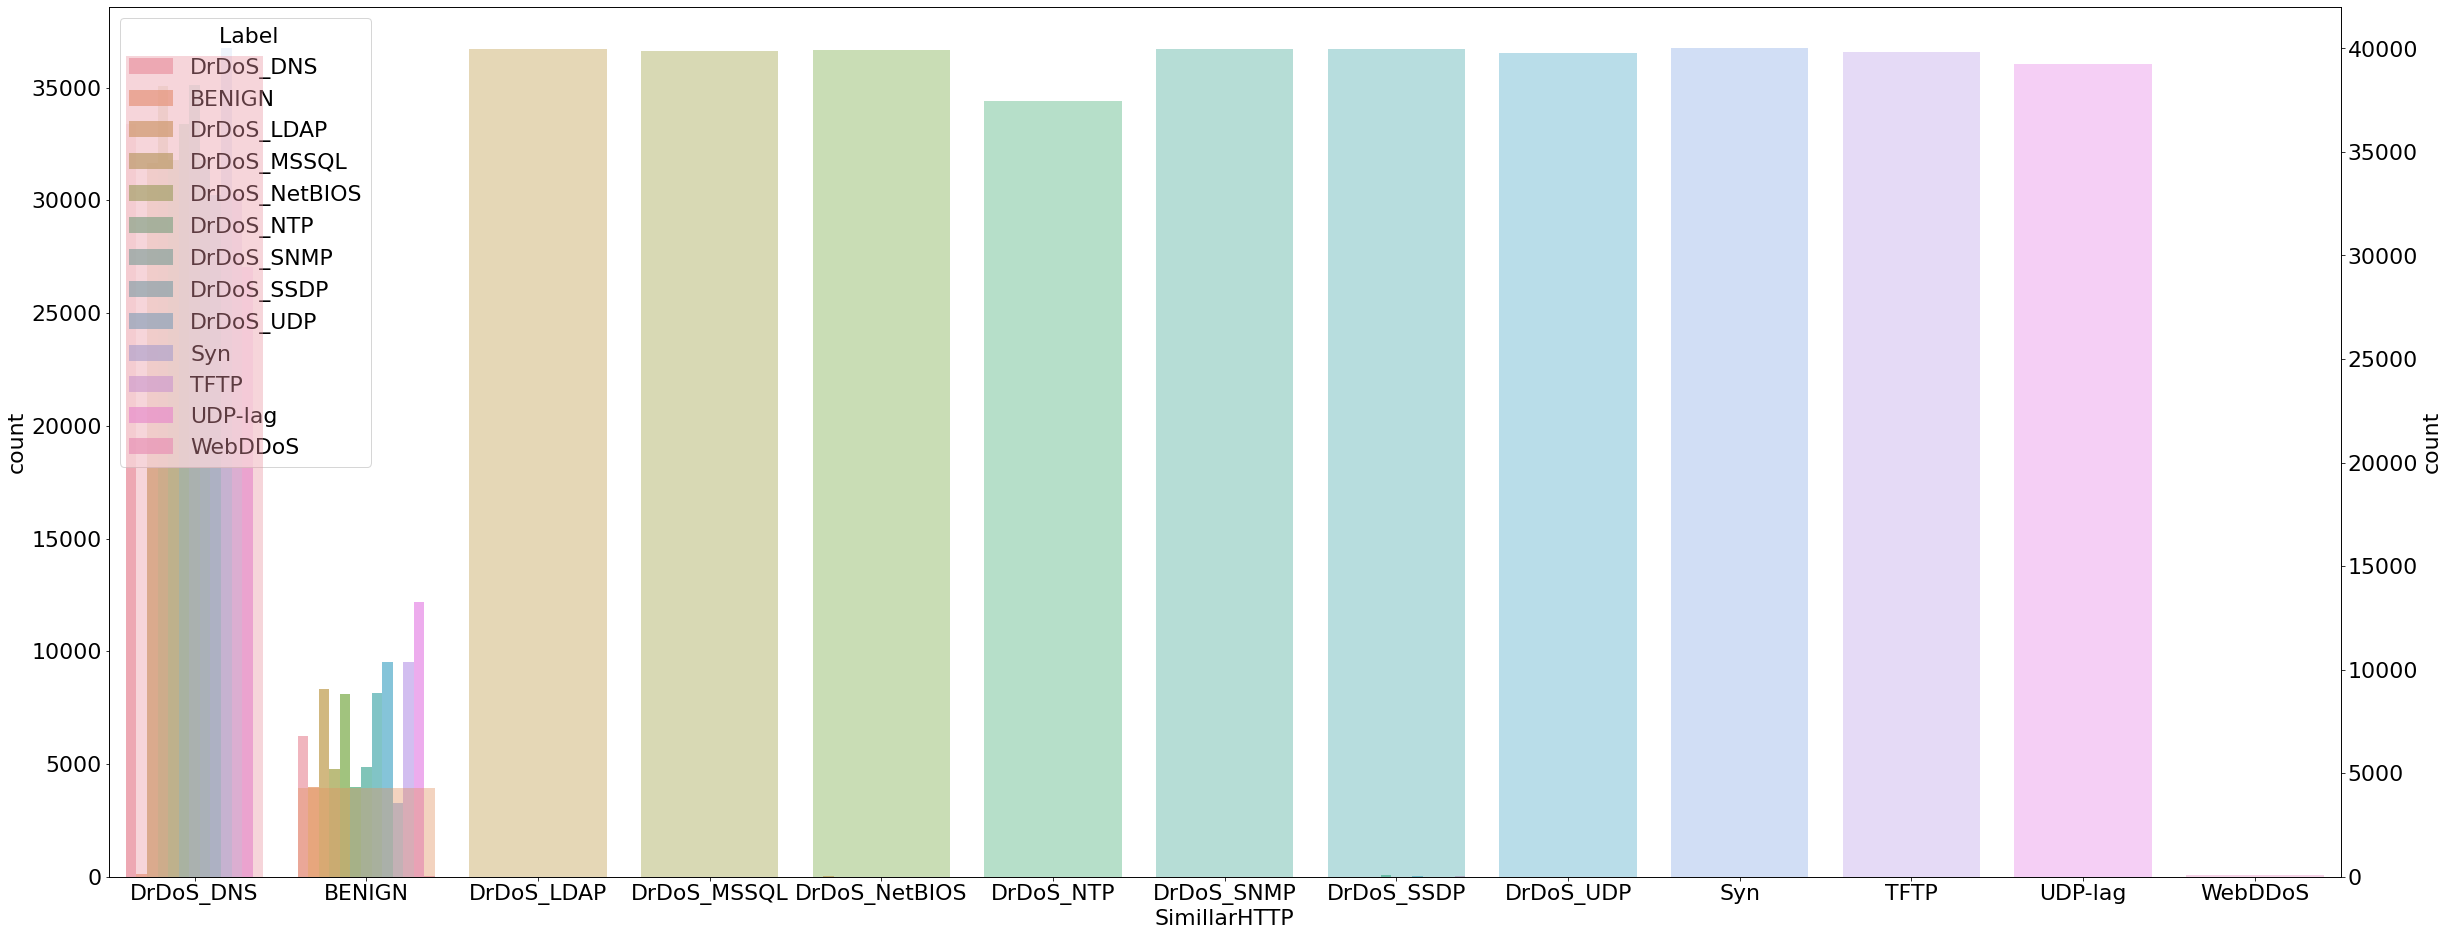

In [ ]:
plt.figure(figsize=(40,16))
g1 = sns.countplot(x='SimillarHTTP', hue=' Label',alpha=0.7, data=data_)
gt = g1.twinx()
gt = sns.countplot(x=' Label', data=data_,alpha=0.4)

In [ ]:
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,...,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
184164,12368,172.16.0.5-192.168.50.1-550-1068-17,172.16.0.5,550,192.168.50.1,1068,17,2018-12-01 11:06:24.339690,1,2,0,2944,0,1472,1472,1472.0,0.0,0,0,0.0,0.0,2.944000e+09,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0,2208.0,1472.0,0.0,776,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,388,0.0,0.0,0,0,0.0,0.0,0,0,0,1,DrDoS_DNS
156979,24112,172.16.0.5-192.168.50.1-939-62932-17,172.16.0.5,939,192.168.50.1,62932,17,2018-12-01 11:06:21.135017,1,2,0,2944,0,1472,1472,1472.0,0.0,0,0,0.0,0.0,2.944000e+09,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0,2208.0,1472.0,0.0,0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,0,0.0,0.0,0,0,0.0,0.0,0,0,0,1,DrDoS_DNS
50603,23589,172.16.0.5-192.168.50.1-564-32767-17,172.16.0.5,564,192.168.50.1,32767,17,2018-12-01 11:06:08.776241,44,2,0,2944,0,1472,1472,1472.0,0.0,0,0,0.0,0.0,6.690909e+07,4.545455e+04,44.0,0.0,44,44,44,44.0,0.0,44,44,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0,2208.0,1472.0,0.0,2024,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,1012,0.0,0.0,0,0,0.0,0.0,0,0,0,1,DrDoS_DNS
138908,11258,172.16.0.5-192.168.50.1-564-42118-17,172.16.0.5,564,192.168.50.1,42118,17,2018-12-01 11:06:19.018219,1,2,0,2944,0,1472,1472,1472.0,0.0,0,0,0.0,0.0,2.944000e+09,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0,2208.0,1472.0,0.0,1912,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,956,0.0,0.0,0,0,0.0,0.0,0,0,0,1,DrDoS_DNS
76981,9526,172.16.0.5-192.168.50.1-559-10300-17,172.16.0.5,559,192.168.50.1,10300,17,2018-12-01 11:06:11.838414,1,2,0,2944,0,1472,1472,1472.0,0.0,0,0,0.0,0.0,2.944000e+09,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0,2208.0,1472.0,0.0,0,0,0,0,0,0,0,2,2944,0,0,-1,-1,1,0,0.0,0.0,0,0,0.0,0.0,0,0,0,1,DrDoS_DNS


In [ ]:
df.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [ ]:
df = df.drop(['Flow ID', ' Source IP',' Source Port',' Destination IP',' Destination Port',' Timestamp','Fwd Packets/s','Flow Bytes/s'], axis = 1) 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
# X_std = StandardScaler().fit_transform(df)

In [ ]:
df = df.drop(['SimillarHTTP'],axis=1)

In [ ]:
# y = df[' Label']
# df = df.drop(columns=[' Label'])
X = StandardScaler().fit_transform(df)
X_norm = preprocessing.normalize(X)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


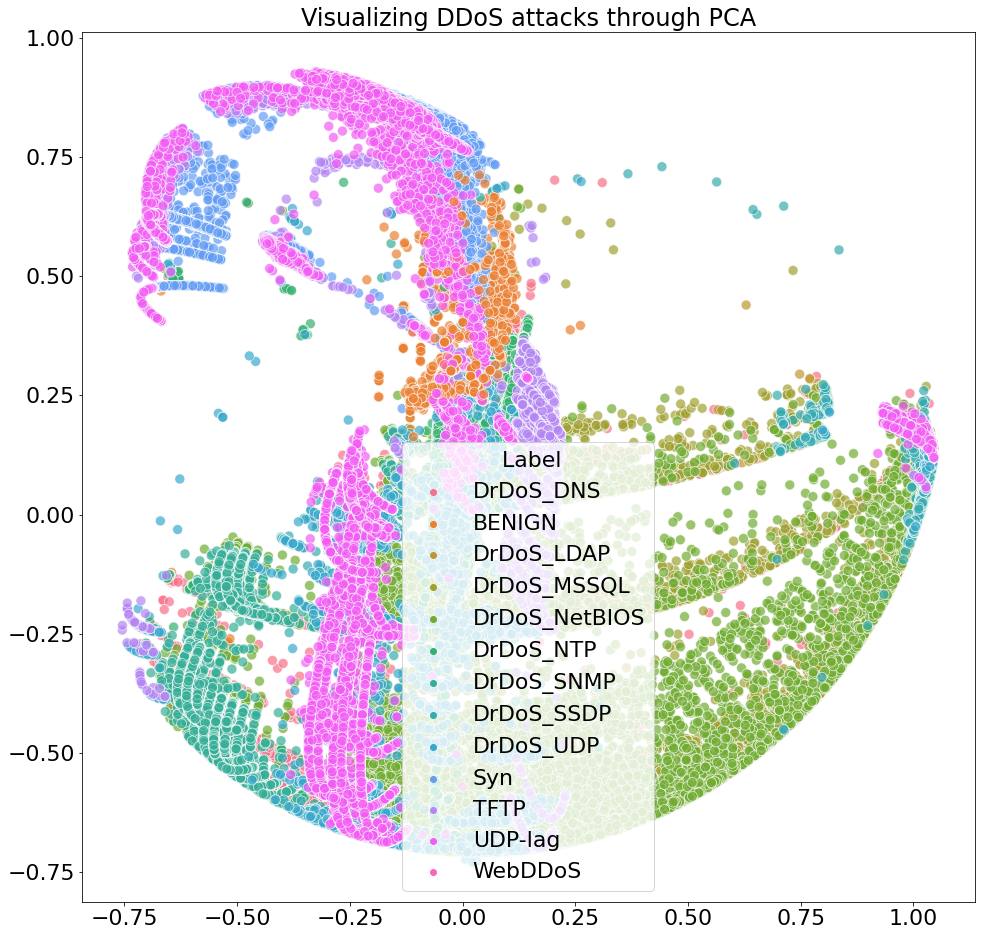

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(X_norm)
plt.figure(figsize=(16,16))
g1 = sns.scatterplot(principalComponents[:, 0], principalComponents[:, 1], s= 100, hue=data_[' Label'], cmap='Spectral',alpha=0.7)
plt.title('Visualizing DDoS attacks through PCA', fontsize=24);

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
pca_ = PCA(n_components=2) 
principalComponents = pca_.fit_transform(X_norm)
# tsne_ = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=600).fit_transform(principalComponents)
# plt.figure(figsize=(16,16))
# g1 = sns.scatterplot(tsne_[:, 0], tsne_[:, 1], s= 100, hue=data_[' Label'], cmap='Spectral',alpha=0.7)
# plt.title('Visualizing DDoS attacks through t-SNE', fontsize=24);

NameError: ignored

In [ ]:
from sklearn.cluster import AgglomerativeClustering
Agglo = AgglomerativeClustering(n_clusters=8)
Agglo.fit(principalComponents)
plt.figure(figsize=(20,11))
plt.scatter(tsne_[:, 0],tsne_[:, 1], c=Agglo.labels_,edgecolors='black')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(8))
plt.title('Visualizing DDoS attacks after Agglomerative Clustering', fontsize=24);
plt.show()

NameError: ignored